## Dogs and finding a new best friend


In [2]:
# Import the # Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yellowbrick
from yellowbrick.features import Rank2D
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split, cross_validate
from sklearn.model_selection import train_test_split
  

### Pulling in the data and getting an overview of what's there

In [3]:
# Import the csv file 
dog = pd.read_csv('/Users/MadamPresident/Desktop/Fall 2023/Project 1/AKC Breed Info v2.csv')

# Check the header
dog.head(5) 

,index,Breed,height_low,height_high,weight_low,weight_high,obey_percent,reps_lower,reps_upper,Classification,Notes
0,138,Affenpinscher,9.0,12.0,8.0,12.0,70.0,16.0,25.0,Above Average Working Dogs,NaN
1,17,Afghan Hound,25.0,27.0,50.0,60.0,0.0,81.0,100.0,Lowest Working/Obedience Intelligence,NaN
2,53,Airedale Terrier,22.0,24.0,45.0,45.0,70.0,16.0,25.0,Above Average Working Dogs,NaN
3,0,Akita,26.0,28.0,80.0,120.0,50.0,26.0,40.0,Average Working/Obedience Intelligence,NaN
4,18,Alaskan Malamute,NaN,NaN,NaN,NaN,50.0,26.0,40.0,Average Working/Obedience Intelligence,Missing some data points


In [4]:
# Remove rows with missing data points
index_names = dog[ dog['Notes'] == 'Missing some data points' ].index
dog.drop(index_names, inplace = True)

# New view
dog.head(5)

,index,Breed,height_low,height_high,weight_low,weight_high,obey_percent,reps_lower,reps_upper,Classification,Notes
0,138,Affenpinscher,9.0,12.0,8.0,12.0,70.0,16.0,25.0,Above Average Working Dogs,NaN
1,17,Afghan Hound,25.0,27.0,50.0,60.0,0.0,81.0,100.0,Lowest Working/Obedience Intelligence,NaN
2,53,Airedale Terrier,22.0,24.0,45.0,45.0,70.0,16.0,25.0,Above Average Working Dogs,NaN
3,0,Akita,26.0,28.0,80.0,120.0,50.0,26.0,40.0,Average Working/Obedience Intelligence,NaN
6,19,American Foxhound,22.0,25.0,65.0,70.0,50.0,26.0,40.0,Average Working/Obedience Intelligence,NaN


In [39]:
# Look at the statisitics to gain additional insights into the data
print('Describe Data')
print(dog.describe())

print(' ')

print('Summarized Data')
print(dog.describe(include = ['O']))

Describe Data
            index  height_low  height_high  weight_low  weight_high   
count  124.000000  124.000000   124.000000  124.000000   124.000000  \
mean    73.532258   18.044355    20.963710   41.580645    55.854839   
std     42.973320    6.473213     7.654685   28.536981    38.183275   
min      0.000000    6.000000     8.000000    2.000000     5.000000   
25%     36.750000   13.000000    15.750000   18.000000    25.000000   
50%     71.500000   18.000000    21.500000   40.000000    52.500000   
75%    109.250000   22.000000    26.000000   60.000000    75.000000   
max    149.000000   48.000000    66.000000  175.000000   190.000000   

       obey_percent  reps_lower  reps_upper  
count    124.000000  124.000000  124.000000  
mean      56.088710   25.443548   41.290323  
std       25.934255   20.569257   28.327864  
min        0.000000    1.000000    4.000000  
25%       50.000000   16.000000   25.000000  
50%       50.000000   26.000000   40.000000  
75%       70.000000   26

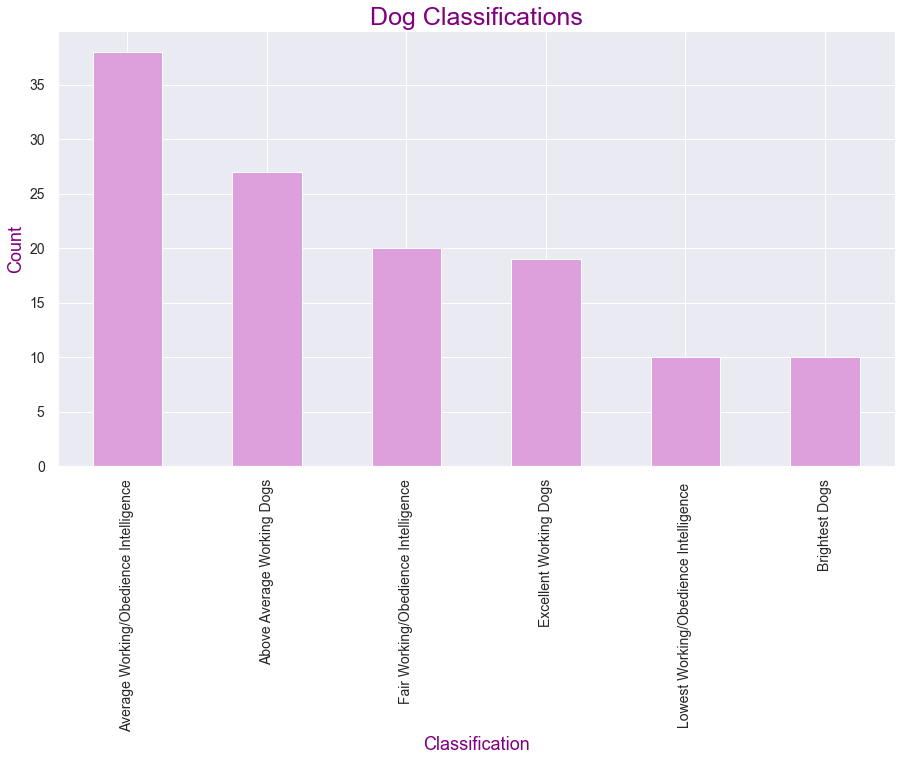

In [333]:
# Breed classification counts
# See counts of the dog breed classifications
wx = dog['Classification'].value_counts().plot(kind = 'bar', 
                                                 fontsize = 14, 
                                                 figsize = (15, 8), 
                                                 color = 'plum')
wx.set_title('Dog Classifications', 
             fontsize = 25,
             color  = 'purple')
wx.set_xlabel('Classification', 
              fontsize = 18,
              color  = 'purple')
wx.set_ylabel('Count', 
              fontsize = 18,
              color  = 'purple');
plt.show()

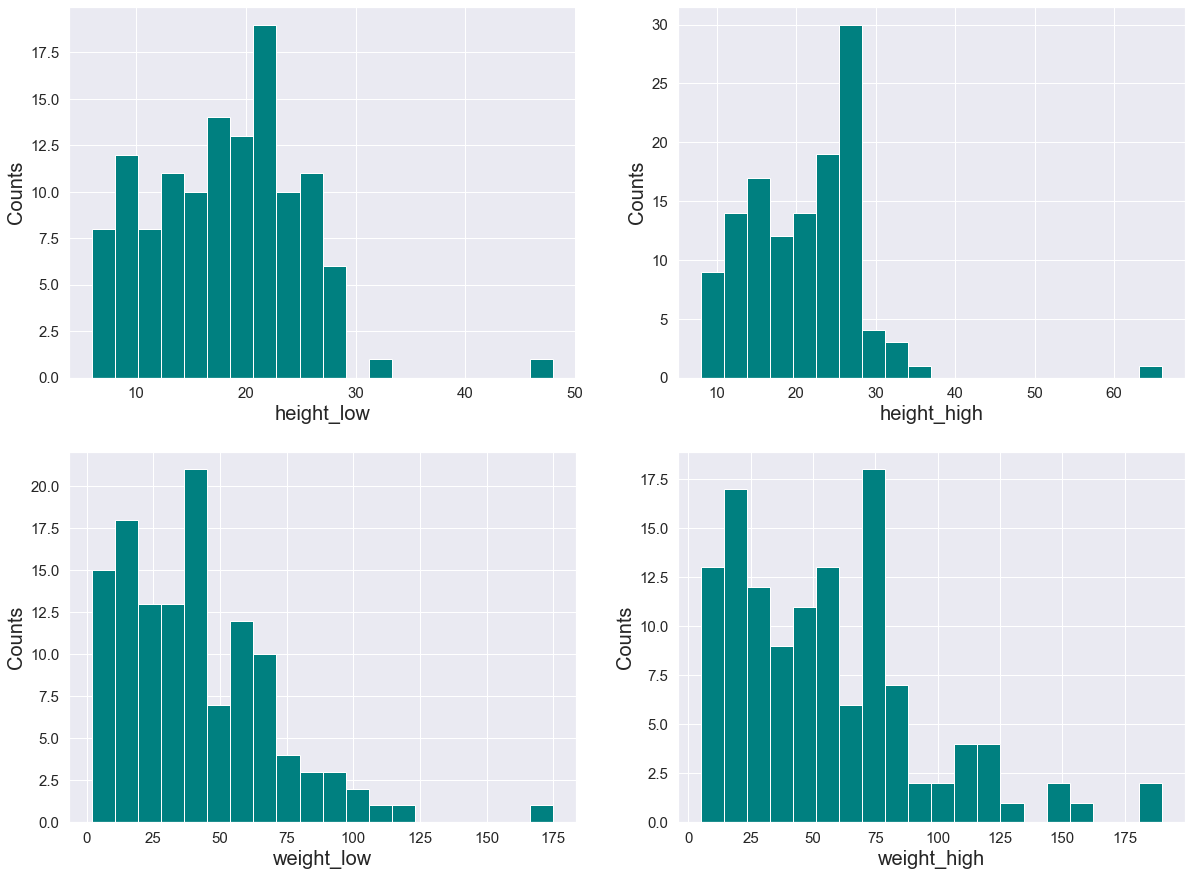

In [178]:
# Dog heights and weights

# Set up the paramenters and make the histograms for: the low/high dog weights and low/high dog heights
# Set up the figure size
plt.rcParams['figure.figsize'] = (20, 15)

# Make the subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['height_low','height_high','weight_low','weight_high']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# Draw the histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(dog[num_features[idx]].dropna(), 
            bins = 20,
           color = 'teal')
    ax.set_xlabel(xaxes[idx], 
                  fontsize = 20)
    ax.set_ylabel(yaxes[idx], 
                  fontsize = 20)
    ax.tick_params(axis = 'both', 
                   labelsize = 15)
plt.show()

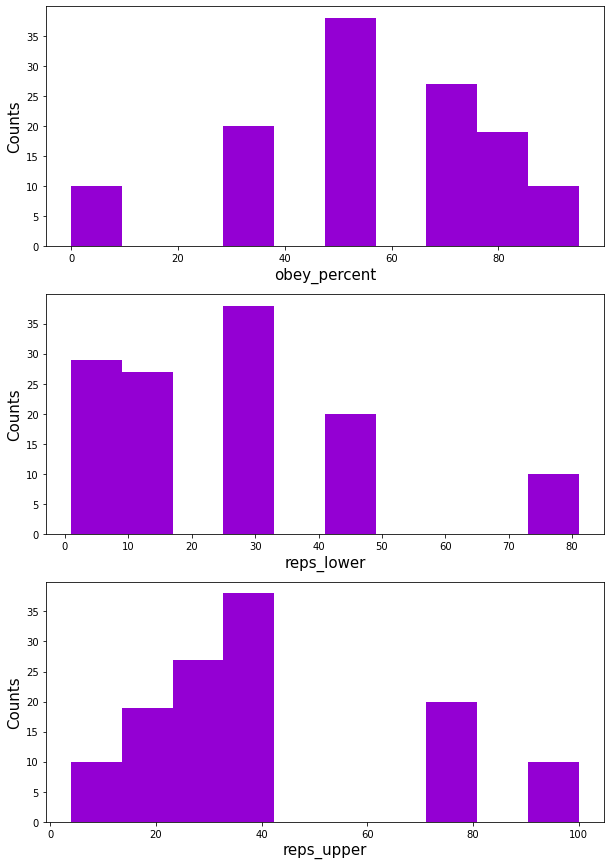

In [38]:
# Obey percents and rep counts

# Set up the paramenters and make the histograms for: obey percents and reps
# Set up the figure size
plt.rcParams['figure.figsize'] = (10, 15)

# Make the subplots
fig, axes = plt.subplots(nrows = 3, ncols = 1)

# Specify the features of interest
num_features = ['obey_percent','reps_lower','reps_upper']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts']

# Draw the histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(dog[num_features[idx]].dropna(), 
            bins = 10,
           color = 'darkviolet')
    ax.set_xlabel(xaxes[idx], 
                  fontsize = 15)
    ax.set_ylabel(yaxes[idx], 
                  fontsize = 15)
    ax.tick_params(axis = 'both', 
                   labelsize = 10)
plt.show()

### Some comparisons to see how the data is distributed and compares to each other

Text(0.5, 1.0, 'Dog Heights (high) and Percent Obeyed')

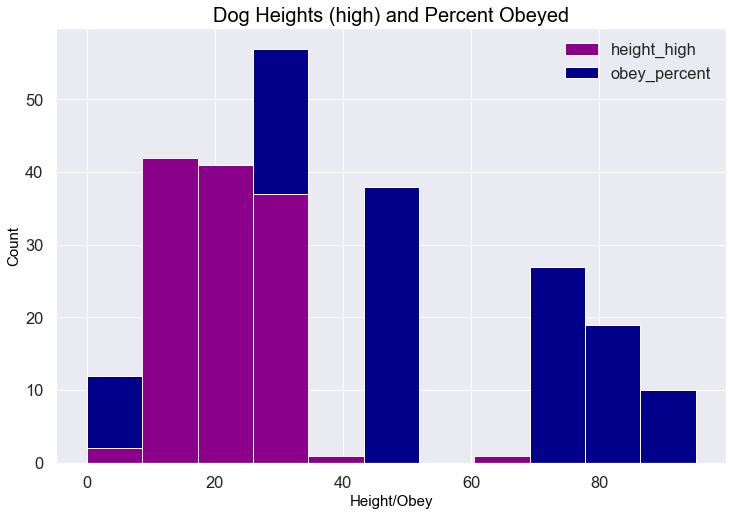

In [327]:
# Compare upper heights and obey percentages

# figure size
plt.figure(figsize = (12, 8))

# Assign colors 
colors = ['darkmagenta', 'darkblue']
names = ['height_high', 'obey_percent']

# Make the graph
plt.hist([dog.height_high, dog.obey_percent],
          bins = int(55/5), 
         stacked = True,
         color = colors, 
         label = names)

# Plot formatting
plt.legend()
plt.xlabel('Height/Obey', 
          fontsize = 15,
          color = 'black')
plt.ylabel('Count', 
          fontsize = 15,
          color = 'black')
plt.title('Dog Heights (high) and Percent Obeyed', 
          fontsize = 20,
          color = 'black')


Text(0.5, 1.0, 'Dog Heights (low) and Percent Obeyed')

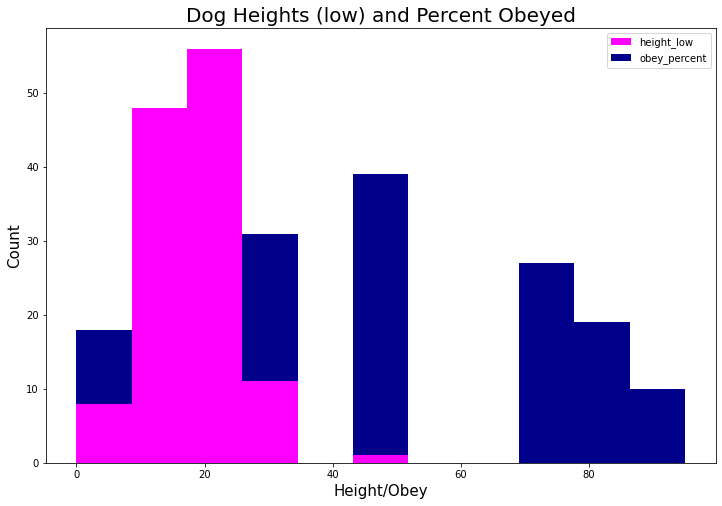

In [58]:
# Compare lower heights and obey percentages

# figure size
plt.figure(figsize = (12, 8))

# Assign colors 
colors = ['magenta', 'darkblue']
names = ['height_low', 'obey_percent']

# Make the graph
plt.hist([dog.height_low, dog.obey_percent],
          bins = int(55/5), 
         stacked = True,
         color = colors, 
         label = names)

# Plot formatting
plt.legend()
plt.xlabel('Height/Obey', 
          fontsize = 15,
          color = 'black')
plt.ylabel('Count', 
          fontsize = 15,
          color = 'black')
plt.title('Dog Heights (low) and Percent Obeyed', 
          fontsize = 20,
          color = 'black')


Text(0.5, 1.0, 'Repitions (low) and Percent Obeyed')

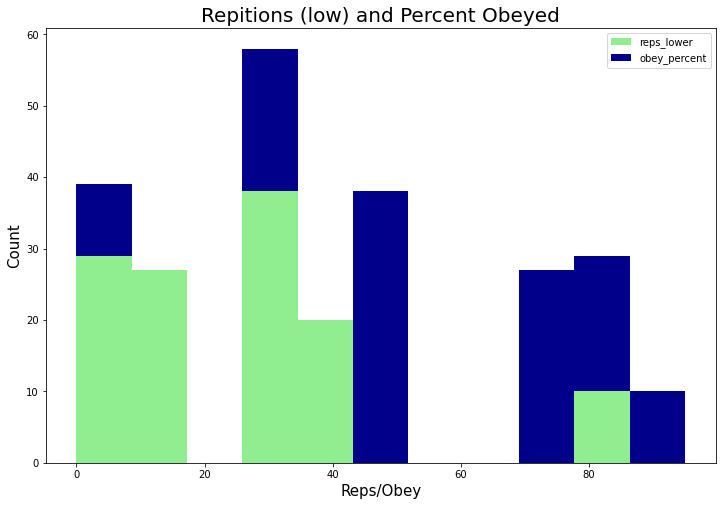

In [67]:
# Compare lower reps and obey percentages

# figure size
plt.figure(figsize = (12, 8))

# Assign colors 
colors = ['lightgreen', 'darkblue']
names = ['reps_lower', 'obey_percent']

# Make the graph
plt.hist([dog.reps_lower, dog.obey_percent],
          bins = int(55/5), 
         stacked = True,
         color = colors, 
         label = names)

# Plot formatting
plt.legend()
plt.xlabel('Reps/Obey', 
          fontsize = 15,
          color = 'black')
plt.ylabel('Count', 
          fontsize = 15,
          color = 'black')
plt.title('Repitions (low) and Percent Obeyed', 
          fontsize = 20,
          color = 'black')


Text(0.5, 1.0, 'Repitions (high) and Percent Obeyed')

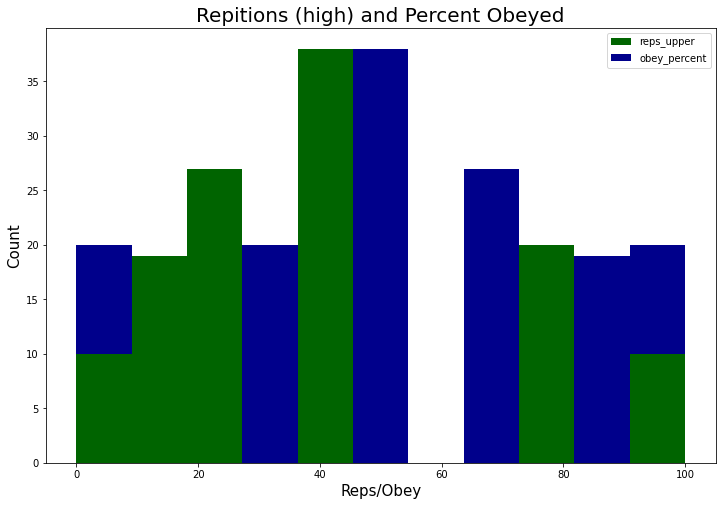

In [68]:
# Compare higher reps and obey percentages

# figure size
plt.figure(figsize = (12, 8))

# Assign colors 
colors = ['darkgreen', 'darkblue']
names = ['reps_upper', 'obey_percent']

# Make the graph
plt.hist([dog.reps_upper, dog.obey_percent],
          bins = int(55/5), 
         stacked = True,
         color = colors, 
         label = names)

# Plot formatting
plt.legend()
plt.xlabel('Reps/Obey', 
          fontsize = 15,
          color = 'black')
plt.ylabel('Count', 
          fontsize = 15,
          color = 'black')
plt.title('Repitions (high) and Percent Obeyed', 
          fontsize = 20,
          color = 'black')


### Some more distribtuons for comparisons and relationships

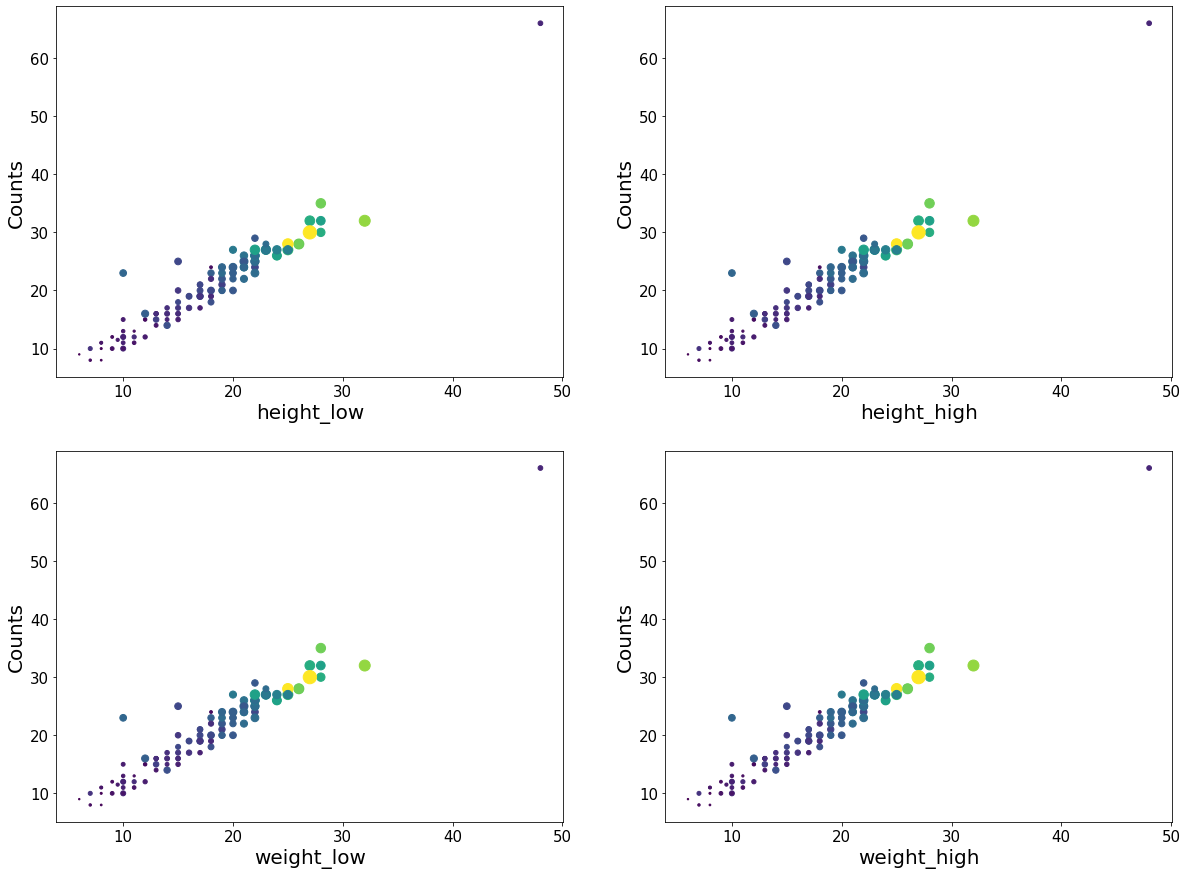

In [74]:
# Weight and reps

# Scatterplots for better distributions

# Set up the paramenters and make the histograms for: the low/high dog weights and low/high dog heights
# Set up the figure size
plt.rcParams['figure.figsize'] = (20, 15)

# Make the subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['height_low','height_high','weight_low','weight_high']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# Draw the histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.scatter(dog['height_low'],
            dog['height_high'],
            dog['weight_low'],
            dog['weight_high'])
    ax.set_xlabel(xaxes[idx], 
                  fontsize = 20)
    ax.set_ylabel(yaxes[idx], 
                  fontsize = 20)
    ax.tick_params(axis = 'both', 
                   labelsize = 15)
plt.show()




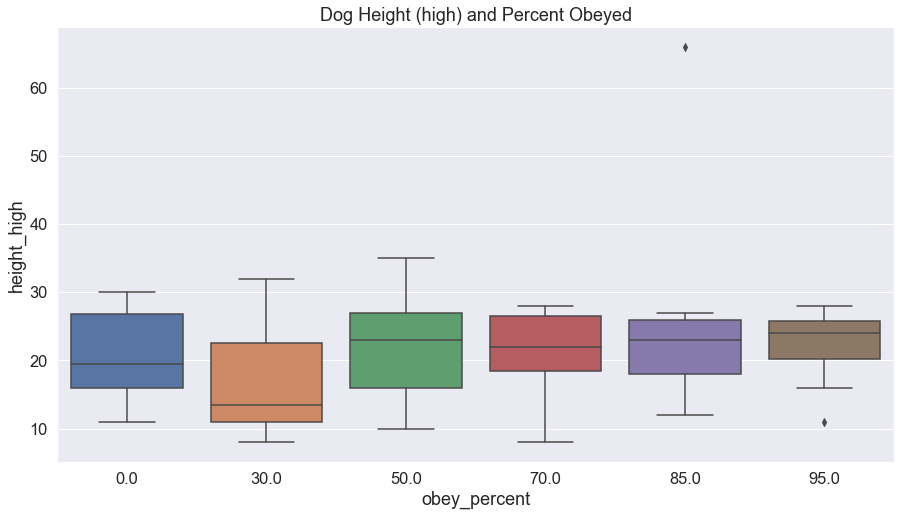

In [109]:
# Compare higher dog heights and obey percentages

# figure size
fig, ax = plt.subplots(figsize = (15, 8))

sns.boxplot( x = dog['obey_percent'], y = dog['height_high']).set(title = 'Dog Height (high) and Percent Obeyed')
sns.set(font_scale= 1.5)

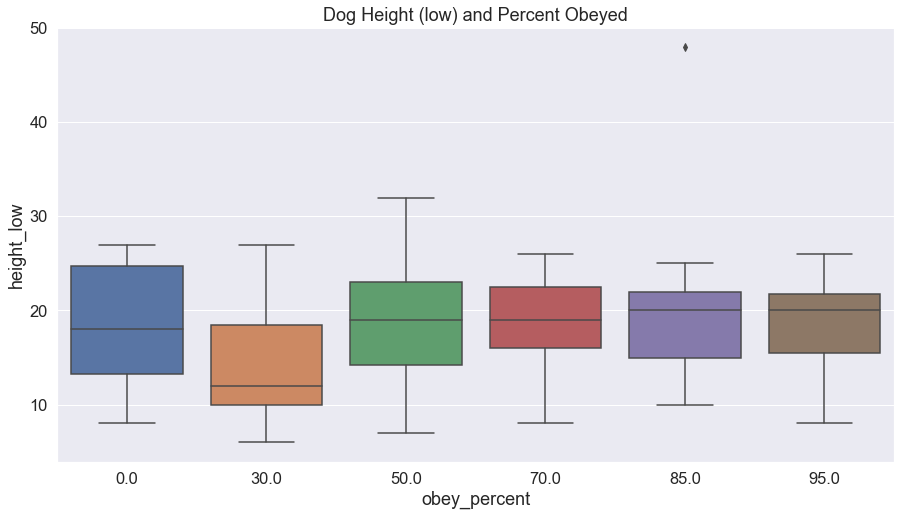

In [111]:
# Compare lower dog heights and obey percentages

# figure size
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot( x = dog['obey_percent'], y = dog['height_low']).set(title = 'Dog Height (low) and Percent Obeyed')
sns.set(font_scale= 1.5)


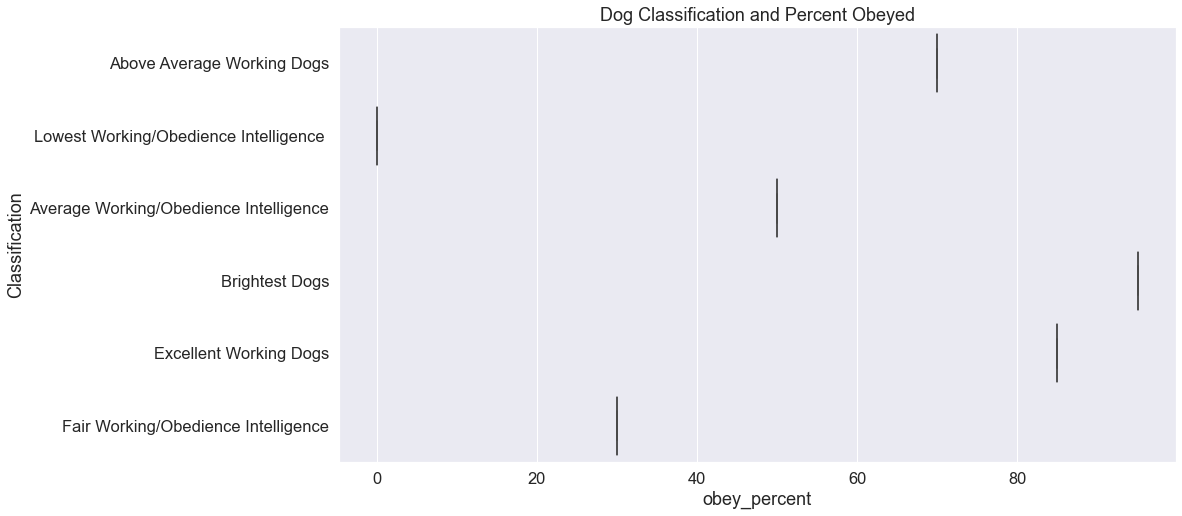

In [123]:
# There wasn't enough variance to make any meaningful boxplot analysis with reps, classification, and/or percentages obeyed
fig, ax = plt.subplots(figsize=(15, 8))

sns.boxplot( x = dog['obey_percent'], y = dog['Classification']).set(title = 'Dog Classification and Percent Obeyed')
sns.set(font_scale= 1.5)


Text(0.5, 1.0, 'Repitions Upper & Lower')

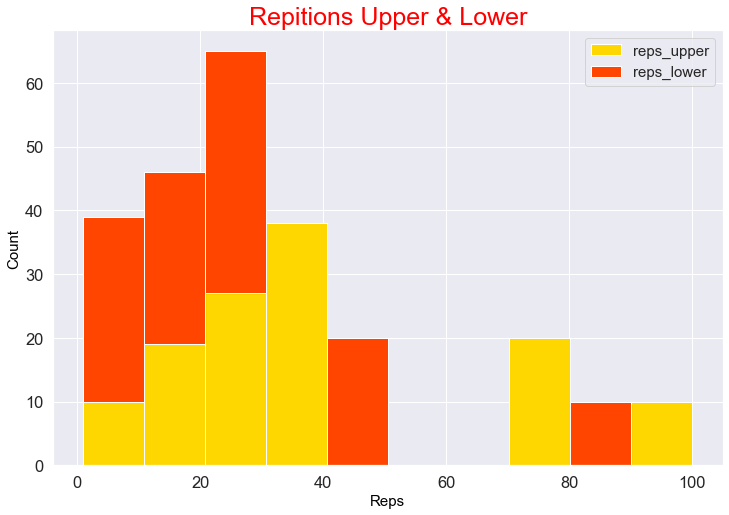

In [150]:
# Have the overview, want to see some direct comparisons
# compare reps and obey
plt.figure(figsize = (12, 8))

# Assign colors 
colors = ['gold', 'orangered']
names = ['reps_upper', 'reps_lower']

# Make the graph
plt.hist([dog.reps_upper, dog.reps_lower],
          bins = int(30/3), 
         stacked = True,
         color = colors, 
         label = names)

# Plot formatting
plt.legend(fontsize = 15)
plt.xlabel('Reps', 
          fontsize = 15,
          color = 'black')
plt.ylabel('Count', 
          fontsize = 15,
          color = 'black')
plt.title('Repitions Upper & Lower', 
          fontsize = 25,
          color = 'red')



Text(0.5, 1.0, 'Dog Weights High & Low')

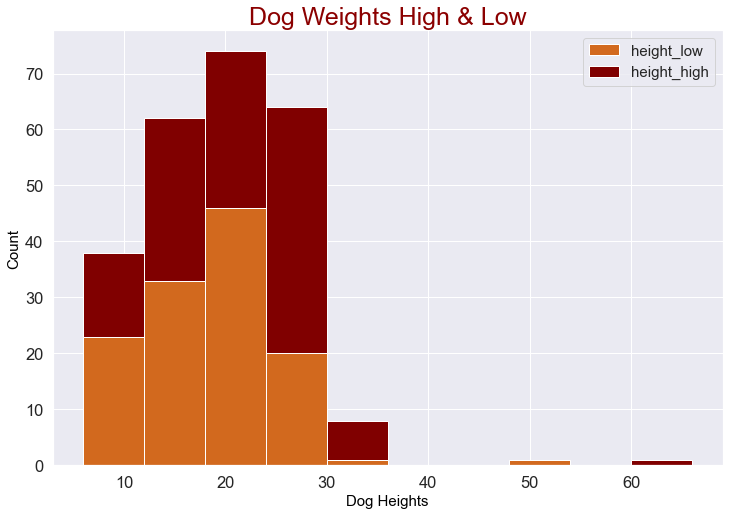

In [154]:
# Have the overview, want to see some direct comparisons
# compare reps and obey
plt.figure(figsize = (12, 8))

# Assign colors 
colors = ['chocolate', 'maroon']
names = ['height_low', 'height_high']

# Make the graph
plt.hist([dog.height_low, dog.height_high],
          bins = int(30/3), 
         stacked = True,
         color = colors, 
         label = names)

# Plot formatting
plt.legend(fontsize = 15)
plt.xlabel('Dog Heights', 
          fontsize = 15,
          color = 'black')
plt.ylabel('Count', 
          fontsize = 15,
          color = 'black')
plt.title('Dog Weights High & Low', 
          fontsize = 25,
          color = 'darkred')



### Relationships

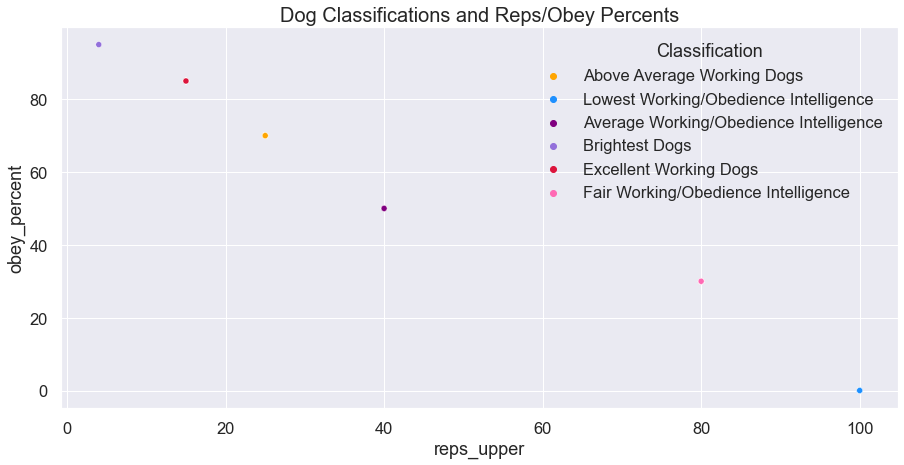

In [338]:
# Shading for classification and reps
sns.scatterplot(x = dog['reps_upper'], y = dog['obey_percent'],hue = "Classification",
              data = dog, 
                    palette=['orange','dodgerblue', 'purple', 
                             'mediumpurple', 'crimson', 'hotpink'], 
                   legend = 'full')
plt.title('Dog Classifications and Reps/Obey Percents', size = 20)
plt.show()

[Text(0.5, 1.0, 'Upper Reps and Percent Obeyed')]

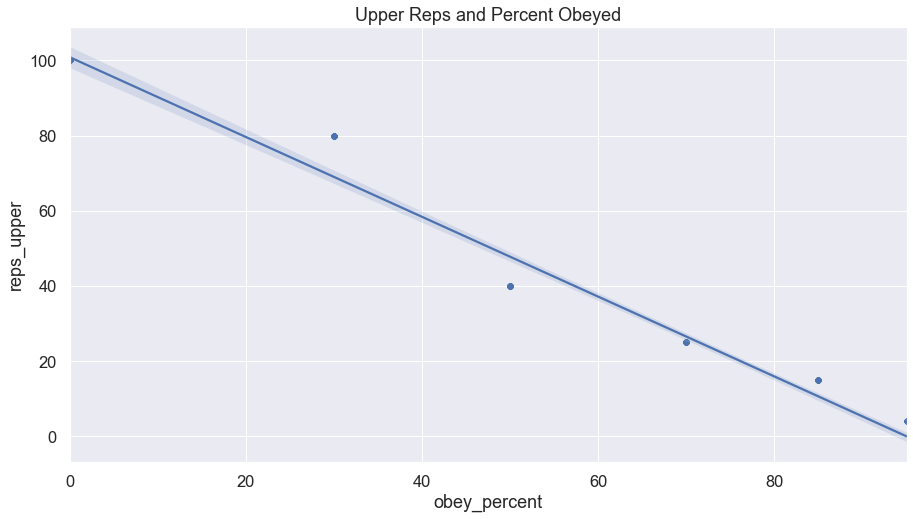

In [330]:
# Bivariate plot to view relationships between reps and percent obeyed

fig, ax = plt.subplots(figsize = (15, 8))

sns.regplot(x = dog['obey_percent'],
            y = dog['reps_upper']).set(title = 'Upper Reps and Percent Obeyed')


[Text(0.5, 1.0, 'Lower Reps and Percent Obeyed')]

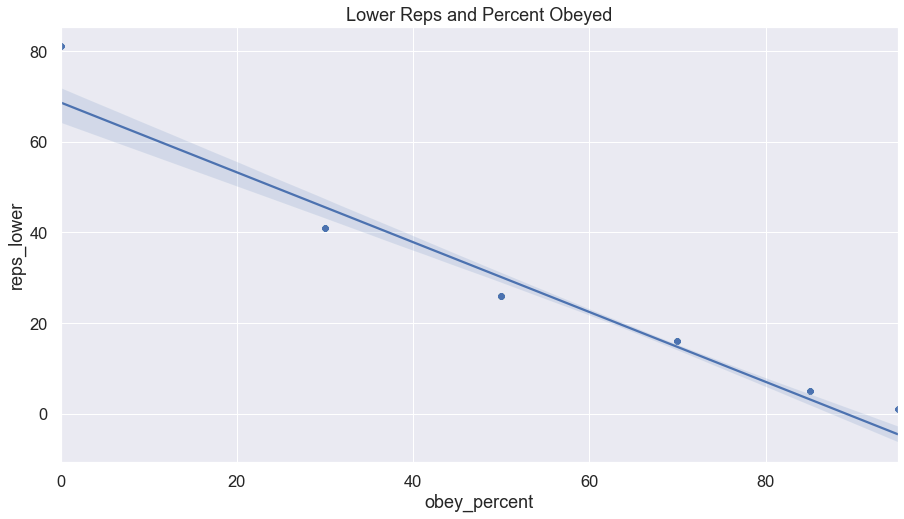

In [329]:
# Bivariate plot to view relationships between reps and percent obeyed

fig, ax = plt.subplots(figsize = (15, 8))

sns.regplot(x = dog['obey_percent'],
            y = dog['reps_lower']).set(title = 'Lower Reps and Percent Obeyed')


### Correlations

In [37]:
# Set up the number features to look for correlations
num_features3 = ['reps_lower', 'reps_upper', 'height_low','height_high', 'obey_percent', 'weight_low', 'weight_high']

array([[ 16. ,  25. ,   9. ,  12. ,  70. ,   8. ,  12. ],
       [ 81. , 100. ,  25. ,  27. ,   0. ,  50. ,  60. ],
       [ 16. ,  25. ,  22. ,  24. ,  70. ,  45. ,  45. ],
       [ 26. ,  40. ,  26. ,  28. ,  50. ,  80. , 120. ],
       [ 26. ,  40. ,  22. ,  25. ,  50. ,  65. ,  70. ],
       [ 16. ,  25. ,  17. ,  19. ,  70. ,  40. ,  50. ],
       [ 26. ,  40. ,  15. ,  18. ,  50. ,  25. ,  45. ],
       [  1. ,   4. ,  17. ,  20. ,  95. ,  35. ,  45. ],
       [ 26. ,  40. ,  18. ,  23. ,  50. ,  40. ,  60. ],
       [ 16. ,  25. ,  10. ,  10. ,  70. ,  10. ,  14. ],
       [ 81. , 100. ,  17. ,  17. ,   0. ,  20. ,  22. ],
       [ 81. , 100. ,  14. ,  14. ,   0. ,  40. ,  50. ],
       [ 81. , 100. ,  13. ,  16. ,   0. ,  18. ,  30. ],
       [ 16. ,  25. ,  20. ,  22. ,  70. ,  40. ,  60. ],
       [ 26. ,  40. ,  15. ,  16. ,  50. ,  18. ,  23. ],
       [  5. ,  15. ,  22. ,  26. ,  85. ,  60. ,  65. ],
       [  5. ,  15. ,  22. ,  26. ,  85. ,  60. ,  75. ],
       [  5. ,

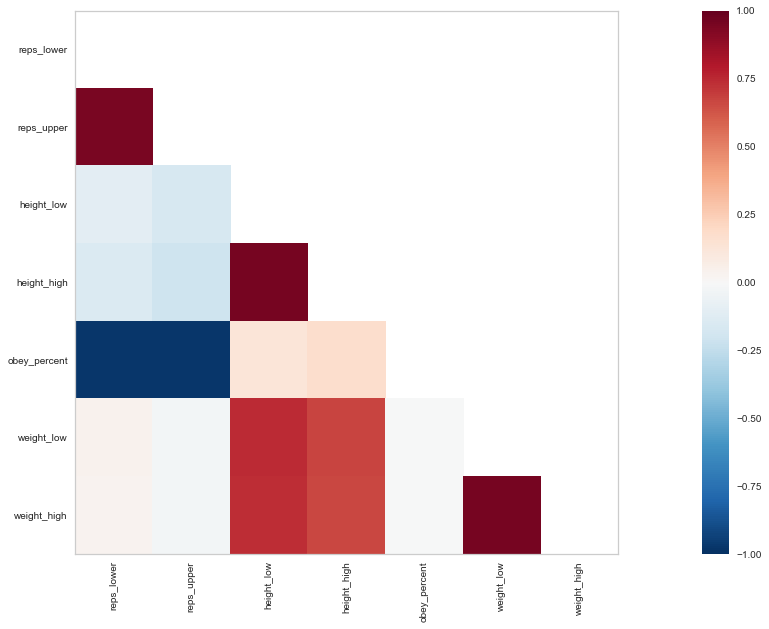

In [38]:
# Correlations
# Set up the figure size
plt.rcParams['figure.figsize'] = (30, 10)

# extract the numpy arrays from the data frame
X = dog[num_features3].to_numpy()

# Instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features = num_features3, algorithm = 'pearson')

# Fit the data to the visualizer
visualizer.fit(X)                

# Transform the data
visualizer.transform(X)  



### Reccomendations, statistics, and additional miscellany

In [196]:
# Set up the classes
above = dog[dog['Classification'] == 'Above Average Working Dogs']
low = dog[dog['Classification'] == 'Lowest Working/Obedience Intelligence']
no = dog[dog['Classification'] == 'No assessment']
avg = dog[dog['Classification'] == 'Average Working/Obedience Intelligence']
exc = dog[dog['Classification'] == 'Excellent Working Dogs']
bright = dog[dog['Classification'] == 'Brightest Dogs']
fair = dog[dog['Classification'] == 'Fair Working/Obedience Intelligence']


Text(0.5, 1.0, 'Top Dog Classifications')

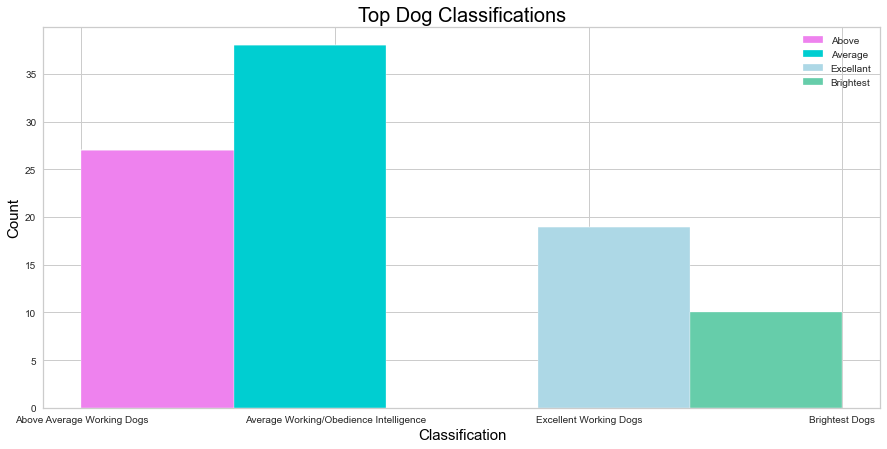

In [222]:
# Comparison of highest ranked dog classess
colors = ['violet', 'darkturquoise', 'lightblue','mediumaquamarine']
names = ['Above', 'Average', 'Excellant', 'Brightest']

# Make the graph
plt.hist([above.Classification, avg.Classification, exc.Classification, bright.Classification],
          bins = int(55/10), 
         stacked = True,
         color = colors, 
         label = names)

# Plot formatting
plt.legend()
plt.xlabel('Classification', 
          fontsize = 15,
          color = 'black')
plt.ylabel('Count', 
          fontsize = 15,
          color = 'black')
plt.title('Top Dog Classifications', 
          fontsize = 20,
          color = 'black')

In [241]:
dog['Classification'].value_counts()

Classification
Average Working/Obedience Intelligence    38
Above Average Working Dogs                27
Fair Working/Obedience Intelligence       20
Excellent Working Dogs                    19
Lowest Working/Obedience Intelligence     10
Brightest Dogs                            10
Name: count, dtype: int64

In [340]:
# Average obeyed by dog class

Average_obey = pd.DataFrame(dog.groupby('Classification')['obey_percent'].mean())

Average_obey.head(10)

,obey_percent
Classification,
Above Average Working Dogs,70.0
Average Working/Obedience Intelligence,50.0
Brightest Dogs,95.0
Excellent Working Dogs,85.0
Fair Working/Obedience Intelligence,30.0
Lowest Working/Obedience Intelligence,0.0


In [6]:
# Average obeyed by reps

Average_reps = pd.DataFrame(dog.groupby('Classification')['reps_lower'].mean())

Average_reps.head(6)

,reps_lower
Classification,
Above Average Working Dogs,16.0
Average Working/Obedience Intelligence,26.0
Brightest Dogs,1.0
Excellent Working Dogs,5.0
Fair Working/Obedience Intelligence,41.0
Lowest Working/Obedience Intelligence,81.0


In [7]:
dogs = dog.pivot_table(index = 'Classification', columns = 'Breed', values = 'obey_percent')
dogs.head(5)

Breed,Affenpinscher,Afghan Hound,Airedale Terrier,Akita,American Foxhound,American Staffordshire Terrier,American Water Spaniel,Australian Cattle Dog,Australian Shepherd,Australian Terrier,...,Tibetan Spaniel,Tibetan Terrier,Vizsla,Weimaraner,Welsh Springer Spaniel,Welsh Terrier,West Highland White Terrier,Whippet,Wirehaired Pointing Griffon,Yorkshire Terrier
Classification,,,,,,,,,,,,,,,,,,,,,
Above Average Working Dogs,70.0,NaN,70.0,NaN,NaN,70.0,NaN,NaN,NaN,70.0,...,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN,NaN,70.0
Average Working/Obedience Intelligence,NaN,NaN,NaN,50.0,50.0,NaN,50.0,NaN,50.0,NaN,...,50.0,NaN,NaN,NaN,NaN,50.0,50.0,50.0,50.0,NaN
Brightest Dogs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Excellent Working Dogs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,85.0,85.0,NaN,NaN,NaN,NaN,NaN,NaN
Fair Working/Obedience Intelligence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Find similar dogs to my breed of choice
correlations = dogs.corrwith(dogs['German Shepherd Dog'])
correlations.head()

Breed
Affenpinscher       NaN
Afghan Hound        NaN
Airedale Terrier    NaN
Akita               NaN
American Foxhound   NaN
dtype: float64

In [10]:
recommendation = pd.DataFrame(correlations,columns = ['Correlation'])
recommendation.dropna(inplace = True)
recommendation = recommendation.join(dog['Breed'])
recommendation.head(10)

,Correlation,Breed
Breed,,


In [14]:
recommendation = pd.DataFrame(correlations,columns = ['Correlation'])
recommendation.dropna(inplace = True)
recommendation = recommendation.join(Average_reps['reps_lower'])
recommendation.head(10)

,Correlation,reps_lower
Breed,,
